# Create SQLite Database with a Sales Table

In [1]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Connect to SQLite DB
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [3]:
# Create sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Insert sample data
data = [
    ("Watch", 10, 1.5),
    ("Bulb", 5, 3.0),
    ("Eraser", 20, 0.5),
    ("Watch", 7, 1.7),
    ("Bulb", 3, 2.8),
    ("Eraser", 10, 0.6)
]

print(data)

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)

# Commit and close
conn.commit()
conn.close()

[('Watch', 10, 1.5), ('Bulb', 5, 3.0), ('Eraser', 20, 0.5), ('Watch', 7, 1.7), ('Bulb', 3, 2.8), ('Eraser', 10, 0.6)]


# Connect and Run SQL Query

In [5]:
import sqlite3
import pandas as pd

# Reconnect to DB
conn = sqlite3.connect("sales_data.db")

In [6]:
# SQL Query: Grouped Sales by Product
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

# Load into DataFrame
df = pd.read_sql_query(query, conn)


# SQL Query: Overall Sales Summary
overall_query = """
SELECT 
    SUM(quantity) AS total_qty_sold,
    SUM(quantity * price) AS total_revenue
FROM sales
"""

overall_df = pd.read_sql_query(overall_query, conn)

# Close connection
conn.close()

# Display Results

In [7]:
# Product-wise summary
print("Basic Sales Summary:\n")
print(df)

# Overall summary
print("\nOverall Sales Summary:\n")
print(overall_df)

Basic Sales Summary:

  product  total_qty  revenue
0    Bulb         16     46.8
1  Eraser         60     32.0
2   Watch         34     53.8

Overall Sales Summary:

   total_qty_sold  total_revenue
0             110          132.6


# Visualize using Bar Chart

<Figure size 1000x500 with 0 Axes>

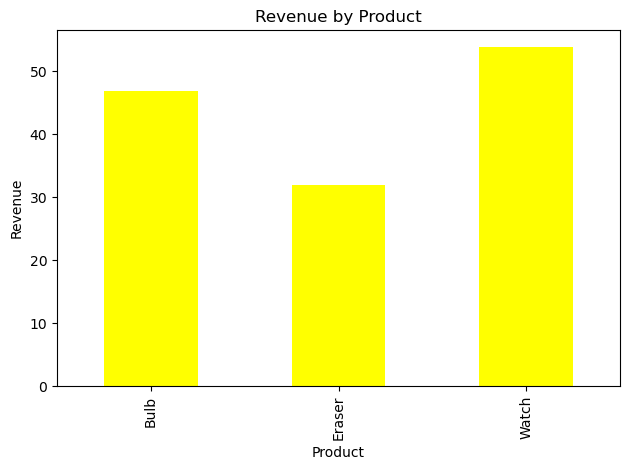

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Basic bar chart
plt.figure(figsize=(10, 5))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='yellow')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

<Figure size 600x400 with 0 Axes>

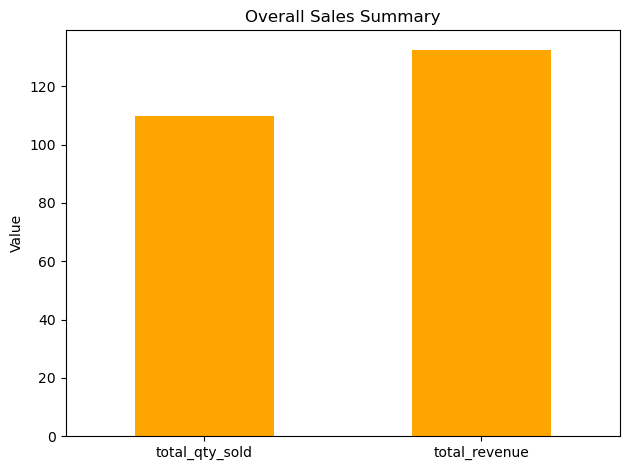

In [10]:
# Plot overall totals as a bar chart
plt.figure(figsize=(6, 4))
overall_df.T.plot(kind='bar', legend=False, color=['orange', 'green'])
plt.title("Overall Sales Summary")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("overall_sales_summary.png")  
plt.show()

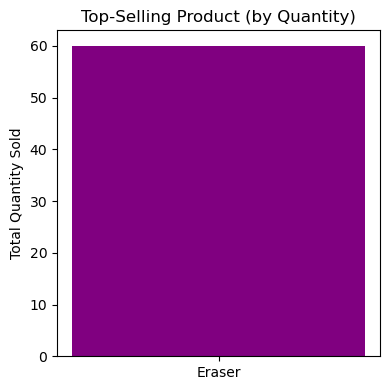

In [11]:
# Bar Chart for Top-Selling Product by Quantity
top_product = df.loc[df['total_qty'].idxmax()]
plt.figure(figsize=(4, 4))
plt.bar(top_product['product'], top_product['total_qty'], color='purple')
plt.title("Top-Selling Product (by Quantity)")
plt.ylabel("Total Quantity Sold")
plt.tight_layout()
plt.savefig("top_selling_product.png") 
plt.show()